 ## Lab - Week 10 - Dropout

### Ways to reduce overfitting in neural networks - all come at a cost
 - Getting more training data
 - Reducing the capacity of the network (last week's lab)
 - Adding weight regularization (last week's lab)
 - Adding dropout (the subject for this week)

### Typical training and validation loss over time
![](https://miro.medium.com/v2/resize:fit:720/format:webp/1*0VWDpLIRcMTssDf-zyOR4w.jpeg)

## Using dropout to reduce overfitting

Dropout is one of the most effective and most commonly used regularization techniques for neural networks, developed by Hinton and his
students at the University of Toronto. Dropout, applied to a layer, consists of randomly "dropping out" (i.e. setting to zero) a number of
output features of the layer during training. Let's say a given layer would normally have returned a vector `[0.2, 0.5, 1.3, 0.8, 1.1]` for a
given input sample during training; after applying dropout, this vector will have a few zero entries distributed at random, e.g. `[0, 0.5,
1.3, 0, 1.1]`. The "dropout rate" is the fraction of the features that are being zeroed-out; it is usually set between 0.2 and 0.5. At test
time, no units are dropped out, and instead the layer's output values are scaled down by a factor equal to the dropout rate, so as to
balance for the fact that more units are active than at training time.

![dropout](https://cdn-images-1.medium.com/max/1600/1*iWQzxhVlvadk6VAJjsgXgg.png)

In Keras you can introduce dropout in a network via the `Dropout` layer, which gets applied to the output of layer right before it, e.g.:
```python
model.add(layers.Dropout(0.5))
```

In [12]:
import keras
keras.__version__

'3.8.0'

### Part 1: Load and Prepare Data - IMDB dataset (same as last week)

In [11]:
from keras import models
from keras import layers
from keras.datasets import imdb
import numpy as np

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
      for j in sequence:
        results[i, j] = 1.  # set specific indices of results[i] to 1s
    return results

# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)
# Our vectorized labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


**As a routine, perform a sanity check on the dataset to understand the shape of the train and test inputs and outputs, and print out a sample of the data.**

In [13]:
#TODO
#your code here

print("x_train shape:", x_train.shape)  # (25000, 10000)
print("x_test shape:", x_test.shape)    # (25000, 10000)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)
print("첫 번째 리뷰 벡터 (일부):", x_train[0][:20])  # 벡터의 앞부분 출력
print("첫 번째 리뷰 라벨:", y_train[0])

x_train shape: (25000, 10000)
x_test shape: (25000, 10000)
y_train shape: (25000,)
y_test shape: (25000,)
첫 번째 리뷰 벡터 (일부): [0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1.]
첫 번째 리뷰 라벨: 1.0


### Part 2: Build a Simple Neural Network Model
Objective: Create a basic neural network model using Keras.

**Questions**
- What type of classification problem are we solving?
- How many neurons should there be in the output layer?
- What should be the activation function of the output layer?
- What loss function should be used?
- What activation function should be used on the hidden layers?


Build a sequential model with ne dense layer with 8 units and train it for 20 epochs.

Complete the code below:

In [14]:
# TODO fix this code
  # Add a single hidden layer with 8 units and proper activation
  # Compile the model with an appropriate optimizer, loss function, and evaluation metric.
  # Show the summary of the model

# 모델 구성
model = models.Sequential()

# 첫 번째 은닉층: 입력 차원은 10000, 8개의 뉴런, ReLU 활성화 함수
model.add(layers.Dense(8, activation='relu', input_shape=(10000,)))

# 출력층: 1개의 뉴런, Sigmoid 활성화 함수
model.add(layers.Dense(1, activation='sigmoid'))

# 모델 컴파일: optimizer, 손실 함수, 평가지표(accuracy) 설정
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 모델 요약 정보 출력
model.summary()

# 모델 학습
hist_a = model.fit(x_train, y_train, epochs=20, batch_size=512, validation_data=(x_test, y_test))

# 모델 평가
evaluation_results = model.evaluate(x_test, y_test)
print("Test accuracy:", evaluation_results[1])



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 8)                   │          80,008 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 80,017 (312.57 KB)

 Trainable params: 80,017 (312.57 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 10s 172ms/step - accuracy: 0.7156 - loss: 0.5920 - val_accuracy: 0.8656 - val_loss: 0.3936
Epoch 2/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 52ms/step - accuracy: 0.8947 - loss: 0.3291 - val_accuracy: 0.8849 - val_loss: 0.3130
Epoch 3/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - accuracy: 0.9242 - loss: 0.2422 - val_accuracy: 0.8874 - val_loss: 0.2916
Epoch 4/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 89ms/step - accuracy: 0.9367 - loss: 0.2010 - val_accuracy: 0.8876 - val_loss: 0.2846
Epoch 5/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.9445 - loss: 0.1787 - val_accuracy: 0.8857 - val_loss: 0.2857
Epoch 6/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - accuracy: 0.9558 - loss: 0.1535 - val_accuracy: 0.8851 - val_loss: 0.2888
Epoch 7/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - accuracy: 0.9573 - loss: 0.1432 - val_accuracy: 0.8809 - val_loss: 0.2970
Epoch 8/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.9634 - loss: 0.1273 - val_accuracy: 0.8799 -

In [15]:
# Train the model
hist_a = model.fit(x_train, y_train, epochs=20, batch_size=512, validation_data=(x_test, y_test))

# Evaluate the model
evaluation_results = model.evaluate(x_test, y_test)
print("Test accuracy:", evaluation_results[1])


Epoch 1/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - accuracy: 0.9929 - loss: 0.0489 - val_accuracy: 0.8610 - val_loss: 0.4554
Epoch 2/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.9932 - loss: 0.0460 - val_accuracy: 0.8593 - val_loss: 0.4715
Epoch 3/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.9934 - loss: 0.0435 - val_accuracy: 0.8582 - val_loss: 0.4839
Epoch 4/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - accuracy: 0.9952 - loss: 0.0392 - val_accuracy: 0.8572 - val_loss: 0.4993
Epoch 5/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.9945 - loss: 0.0374 - val_accuracy: 0.8568 - val_loss: 0.5107
Epoch 6/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.9958 - loss: 0.0350 - val_accuracy: 0.8562 - val_loss: 0.5249
Epoch 7/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.9956 - loss: 0.0326 - val_accuracy: 0.8561 - val_loss: 0.5379
Epoch 8/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.9961 - loss: 0.0319 - val_accuracy: 0.8542 - v

### Part 3: Visualize Training and Validation Performance

The function below can be used later to plot the loss and accuracy from the model training history

In [ ]:
# Helper function

import matplotlib.pyplot as plt

# colors will be used to plot the different models below
colors = ['blue', 'red', 'green', 'purple', 'orange', 'brown', 'pink', 'gray', 'olive', 'cyan']

def plot_history(history, color='blue', prefix=""):
    history_dict = history.history
    loss_values = history_dict["loss"]
    val_loss_values = history_dict["val_loss"]
    epochs = range(1, len(loss_values) + 1)

    # 손실값 그래프
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss_values, "o", color=color, label=prefix + " Training loss")
    plt.plot(epochs, val_loss_values, color=color, label=prefix + " Validation loss")
    plt.title("Training and validation loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend(framealpha=0.5)
    plt.grid()

    # 정확도 그래프 (검증 정확도만 표시)
    plt.subplot(1, 2, 2)
    acc_values = history_dict.get("accuracy") or history_dict.get("acc")  # keras 버전에 따라 다름
    val_acc_values = history_dict.get("val_accuracy") or history_dict.get("val_acc")
    plt.plot(epochs, val_acc_values, color=color, label=prefix + " Validation accuracy")
    plt.title("Training and validation accuracy")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend(framealpha=0.5)
    plt.grid()


In [ ]:
# Using the plotting function
plt.figure(figsize=(12, 6))
plot_history(hist_a, color='blue', prefix="Small model")
plt.show()

### Part 4: Add Dropout Regularization
Objective: Experiment with dropout layers in the model.

**Instructions:**
1. Add another hidden layer with 8 units
1. Add dropout layers after each hidden layer with a dropout rate of 0.3.
1. Compile the model.
1. Train the model and observe the changes in accuracy.

Complete the code below:

In [ ]:
# TODO: Build a model with 30% Dropout

drp_model = models.Sequential()
drp_model.add(layers.Dense(8, activation='relu', input_shape=(10000,)))
drp_model.add(layers.Dropout(0.3))  # 첫 번째 은닉층 후 Dropout (30%)
drp_model.add(layers.Dense(8, activation='relu'))
drp_model.add(layers.Dropout(0.3))  # 두 번째 은닉층 후 Dropout (30%)
drp_model.add(layers.Dense(1, activation='sigmoid'))

drp_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
drp_model.summary()

# 모델 학습
drp_history = drp_model.fit(x_train, y_train, epochs=20, batch_size=512, validation_data=(x_test, y_test))

# 학습 기록 시각화
plt.figure(figsize=(12, 6))
plot_history(drp_history, color='red', prefix="Dropout 0.3")
plt.show()


In [ ]:
# Plot training history
plt.figure(figsize=(12, 6))
plot_history(drp_history, color='red', prefix="Dropout 0.3")

### Part 5: Test Different Dropout Rates
Objective: Compare the model's performance with varying dropout rates.

**Instructions:**
1. Write a loop to create and train models with dropout rates of `[0, 0.2, 0.3, 0.4, 0.5]`.
2. For each model, record the history to plot it later


Complete the code below:

Training model with dropout rate: 0
Training model with dropout rate: 0.2
Training model with dropout rate: 0.3
Training model with dropout rate: 0.4
Training model with dropout rate: 0.5


KeyError: 'acc'

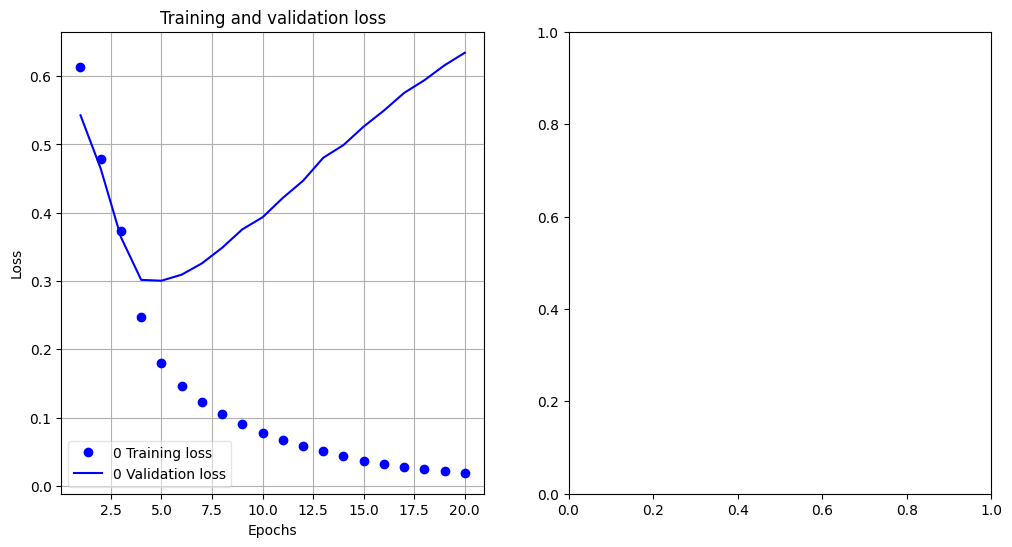

In [26]:
rates = [0, 0.2, 0.3, 0.4, 0.5]
hists = []

for rate in rates:
    print(f"Training model with dropout rate: {rate}")
    model = models.Sequential()
    model.add(layers.Dense(8, activation='relu', input_shape=(10000,)))
    # dropout rate가 0이 아니면 첫 번째 은닉층 후에 Dropout 적용
    if rate > 0:
        model.add(layers.Dropout(rate))
    model.add(layers.Dense(8, activation='relu'))
    if rate > 0:
        model.add(layers.Dropout(rate))
    model.add(layers.Dense(1, activation='sigmoid'))

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    # verbose=0: 학습 중 출력 생략 (여러 모델 학습 시 깔끔하게 출력)
    hist = model.fit(x_train, y_train, epochs=20, batch_size=512, validation_data=(x_test, y_test), verbose=0)
    hists.append(hist)

# 각 dropout 비율에 따른 성능 시각화
plt.figure(figsize=(12, 6))
for i, hist in enumerate(hists):
    plot_history(hist, colors[i], prefix=str(rates[i]))
plt.show()



In [ ]:
plt.figure(figsize=(12, 6))
for i, hist in enumerate(hists):
    plot_history(hist, colors[i], prefix=str(rates[i]))

### Part 6: Experiment with dropout location
Objective: Compare the model's performance with dropout placed after different layers

**Instructions:**
Create 3 models with a single dropout "layer" placed:
1. Before the first dense layer only
2. After the first dense layer only
3. After the second dense layer only



Complete the code below:

In [ ]:
hists_b = [] #append the training history of 3 cases mentioned above
rate = 0.4
#TODO: your code here

# 1. Dropout을 입력층 바로 뒤에 추가 (첫 번째 은닉층 전에)
model_before = models.Sequential()
model_before.add(layers.Dropout(rate, input_shape=(10000,)))  # 입력에 dropout 적용
model_before.add(layers.Dense(8, activation='relu'))
model_before.add(layers.Dense(8, activation='relu'))
model_before.add(layers.Dense(1, activation='sigmoid'))
model_before.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
hist_before = model_before.fit(x_train, y_train, epochs=20, batch_size=512, validation_data=(x_test, y_test), verbose=0)
hists_b.append(hist_before)

# 2. Dropout을 첫 번째 은닉층 후에 추가
model_after1 = models.Sequential()
model_after1.add(layers.Dense(8, activation='relu', input_shape=(10000,)))
model_after1.add(layers.Dropout(rate))
model_after1.add(layers.Dense(8, activation='relu'))
model_after1.add(layers.Dense(1, activation='sigmoid'))
model_after1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
hist_after1 = model_after1.fit(x_train, y_train, epochs=20, batch_size=512, validation_data=(x_test, y_test), verbose=0)
hists_b.append(hist_after1)

# 3. Dropout을 두 번째 은닉층 후에 추가
model_after2 = models.Sequential()
model_after2.add(layers.Dense(8, activation='relu', input_shape=(10000,)))
model_after2.add(layers.Dense(8, activation='relu'))
model_after2.add(layers.Dropout(rate))
model_after2.add(layers.Dense(1, activation='sigmoid'))
model_after2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
hist_after2 = model_after2.fit(x_train, y_train, epochs=20, batch_size=512, validation_data=(x_test, y_test), verbose=0)
hists_b.append(hist_after2)


In [ ]:
plt.figure(figsize=(12, 6))
prefixes = ['before 1st layer', 'after 1st layer', 'after 2nd layer']
for i, hist in enumerate(hists_b):
    plot_history(hist, colors[i], prefix=prefixes[i])